In [1]:
import json, os, torch
import numpy as np
import matplotlib.pyplot as plt
def read_json(pth):
    assert os.path.exists(pth)
    with open(pth) as fp:
        return json.load(fp)

def to_json(obj, pth):
    with open(pth, "w") as fp:
        json.dump(obj, fp)


In [9]:
preds = read_json("output/1RchFn-zZDw-results.json")

print(preds[0].keys())
for pred in preds:
    print(
        pred['image_id'],
        pred['category_id'],
        np.array(pred['keypoints']).shape,
        pred['score'],
        np.array(pred['box']),
        pred['idx'],
    )
    break





dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])
0.jpg 1 (51,) 3.1060922145843506 [533.31903076 268.63006592 243.50982666 263.4899292 ] [0.0]


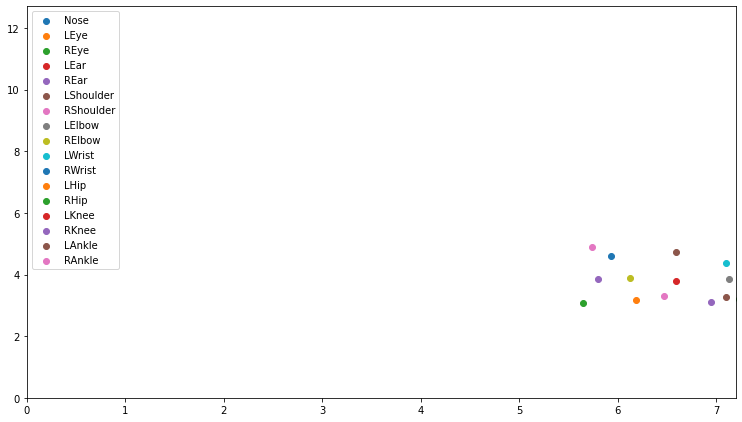

In [15]:
gt_labels = {
        "Nose"          : torch.LongTensor([0]),
        "LEye"          : torch.LongTensor([1]),
        "REye"          : torch.LongTensor([2]),
        "LEar"          : torch.LongTensor([3]),
        "REar"          : torch.LongTensor([4]),
        "LShoulder"     : torch.LongTensor([5]),
        "RShoulder"     : torch.LongTensor([6]),
        "LElbow"        : torch.LongTensor([7]),
        "RElbow"        : torch.LongTensor([8]),
        "LWrist"        : torch.LongTensor([9]),
        "RWrist"        : torch.LongTensor([10]),
        "LHip"          : torch.LongTensor([11]),
        "RHip"          : torch.LongTensor([12]),
        "LKnee"         : torch.LongTensor([13]),
        "RKnee"         : torch.LongTensor([14]),
        "LAnkle"        : torch.LongTensor([15]),
        "RAnkle"        : torch.LongTensor([16]),

}

joints = {
        "LArm_joint" : ["LWrist", "LElbow", "LShoulder"],
        "RArm_joint" : ["RWrist", "RElbow", "RShoulder"],
        "LLeg_joint" : ["LAnkle", "LKnee", "LHip"],
        "RLeg_joint" : ["RAnkle", "RKnee", "RHip"],
}


class Skeleton:
        def get_angle(self, ptA, ptB, ptC):
                dist = lambda x, y: torch.dist(x, y, p=2)
                lnAB = dist(ptA, ptB)
                lnBC = dist(ptB, ptC)
                lnAC = dist(ptA, ptC)
                theta = torch.acos(((lnAB**2) + (lnBC**2) - (lnAC**2)) / (2 * lnAB * lnBC))
                return np.degrees(theta)

        def add_centroids(self, d):
                for key in ['Hip', 'Ankle', 'Knee', 'Shoulder', 'Wrist']:
                        d[f"C{key}"] = (d[f"L{key}"] + d[f"R{key}"]) / 2
                return d
                
        def add_angles(self, d):
                # Use law of cosines.
                for j, (ka, kb, kc) in joints.items():
                        d[j] = self.get_angle(d[ka], d[kb], d[kc])
                return d
        
        def plot(self):
                fig = plt.figure(figsize=(12.70, 7.20))
                ax = fig.add_subplot(111)
                ax.set_xlim([0, 7.20])
                ax.set_ylim([0, 12.70])
                for k, v in self.feat_dict.items():
                        ax.scatter(v[0] / 100, v[1] / 100, label=k)
                ax.legend()

        def __init__(self, arr):
                raw_input = torch.Tensor(arr).view(-1, 3)
                self.feat_dict = {k : raw_input[v.item()] for (k, v) in gt_labels.items()}
                # self.feat_dict = self.add_centroids(self.feat_dict)
                # self.feat_dict = self.add_angles(self.feat_dict)
                # print(self.feat_dict)
                
                

s = Skeleton(pred['keypoints'])

s.plot()

In [12]:
x = torch.Tensor(pred['keypoints']).view(-1, 3)

x, y, z = x[:3]

torch.dist(x, y)

tensor(8.4867)